# Handwritten digits playground

### Imports

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")

from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from keras.metrics import binary_accuracy, categorical_accuracy

### Load dataset

In [57]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()
train_x = np.expand_dims(train_x, axis=3).astype('float32')
train_x /= 255
test_x = np.expand_dims(test_x, axis=3).astype('float32')
test_x /= 255
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

### Model

#####  LeNet-5 - Modified version

In [58]:
model = Sequential(name='LeNet-5')
# Layer C1 (convolution) - 6 feature maps 28x28
model.add(Conv2D(6, (5,5), strides=(1,1), input_shape=(28,28,1), name='C1', activation='relu'))

# Layer S2 (sub-sampling) - 6 feature maps 14x14
model.add(AveragePooling2D(pool_size=(2,2), name='S2'))

# Layer C3 (convolution) - 16 feature maps 10x10
model.add(Conv2D(16, (5,5), strides=(1,1), name='C3', activation='relu'))

# Layer S4 (sub-samlping) - 16 feature maps 5x5
model.add(AveragePooling2D(pool_size=(2,2), name='S4'))

# Layer C5 (convolution) - 16 feature maps 10x10 - Flattened layer
model.add(Conv2D(120, (4,4), strides=(1,1), name='C5', activation='relu'))
model.add(Flatten(name='C5-Flat'))
model.add(Dense(120, name='C5-Dense', activation='relu'))

# Layer F6 - Full connection 84
model.add(Dense(84, name='F6'))

# Output layer
model.add(Dense(10, activation='softmax', name='Output'))

model.summary()
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

Model: "LeNet-5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C1 (Conv2D)                  (None, 24, 24, 6)         156       
_________________________________________________________________
S2 (AveragePooling2D)        (None, 12, 12, 6)         0         
_________________________________________________________________
C3 (Conv2D)                  (None, 8, 8, 16)          2416      
_________________________________________________________________
S4 (AveragePooling2D)        (None, 4, 4, 16)          0         
_________________________________________________________________
C5 (Conv2D)                  (None, 1, 1, 120)         30840     
_________________________________________________________________
C5-Flat (Flatten)            (None, 120)               0         
_________________________________________________________________
C5-Dense (Dense)             (None, 120)               1452

ValueError: Unknown loss function:accuracy

In [31]:
history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=15)
y_pred = model.predict(test_x)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 24s 394us/step - loss: 0.2127 - accuracy: 0.9337 - val_loss: 0.0637 - val_accuracy: 0.9803
Epoch 2/15
60000/60000 [==============================] - 23s 384us/step - loss: 0.0700 - accuracy: 0.9779 - val_loss: 0.0521 - val_accuracy: 0.9830
Epoch 3/15
60000/60000 [==============================] - 17s 287us/step - loss: 0.0511 - accuracy: 0.9847 - val_loss: 0.0364 - val_accuracy: 0.9882
Epoch 4/15
60000/60000 [==============================] - 20s 330us/step - loss: 0.0408 - accuracy: 0.9876 - val_loss: 0.0387 - val_accuracy: 0.9872
Epoch 5/15
60000/60000 [==============================] - 23s 378us/step - loss: 0.0322 - accuracy: 0.9902 - val_loss: 0.0543 - val_accuracy: 0.9817
Epoch 6/15
60000/60000 [==============================] - 20s 328us/step - loss: 0.0286 - accuracy: 0.9910 - val_loss: 0.0497 - val_accuracy: 0.9852
Epoch 7/15
60000/60000 [==============================] 

In [32]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


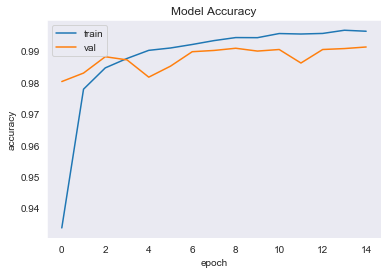

In [53]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

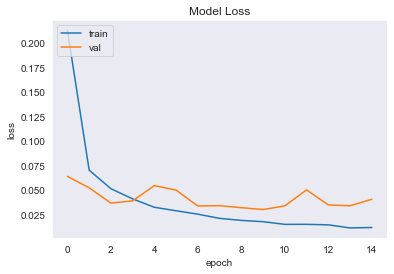

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()